In [1]:
import numpy as np
from sklearn.cluster import *
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as sm

In [2]:
import pymysql
conn = pymysql.Connect(  # 配置数据库
    host='1.15.220.155',
    port=3306,
    user='test',
    password='991125',
    db='spider',
    charset='UTF8'
)
cursor = conn.cursor()

sql = 'select domain, test_layout_group, test_tfidf_group, app_group, ipc_code from cluster_noadj'
cursor.execute(sql)

dataset = cursor.fetchall()

In [3]:
temp_X = pd.DataFrame(dataset)
domains = temp_X[[0]]
X = temp_X[[1, 2, 3, 4]]
print(X)
print(domains)

          1     2    3          4
0         0     0    0  104021040
1         1     1    1  172247129
2         2     2    0  172067145
3         3     3    0  104021043
4         4     4    2  023224179
...     ...   ...  ...        ...
10973  1329   156    1  118107046
10974   123    52    8  104021028
10975   179   104  153  027124041
10976   373  2056  204  168206066
10977  1877   255    1  122010161

[10978 rows x 4 columns]
                   0
0         0047yy.com
1          007ps.com
2          00ysw.com
3       01kankan.com
4      021juyuan.com
...              ...
10973     zzrxbw.com
10974     zztxby.com
10975       zzw5.com
10976     zzxsms.com
10977     zzzcet.com

[10978 rows x 1 columns]


In [4]:
X = RobustScaler().fit_transform(X)
print(X[0])

[-0.79341737 -0.66566781 -0.30701754 -0.05052387]


In [5]:
print(X.shape)

(10978, 4)


In [6]:
# for i in range(5,50,1):
# Compute DBSCAN
db = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None).fit(X)
# db = DBSCAN(eps=0.2, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print(i)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 5213
Silhouette Coefficient: 0.474


In [7]:
count = {}
for label in labels:
    if count.get(label):
        count[label]+=1
    else:
        count[label]=1

In [8]:
number = 0
for i in count.values():
    if i == 1:
        number+=1
print(number)

2994


In [9]:
print(labels)

[2266 3576 3576 ... 1584 2047 2834]


In [10]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D # 空间三维画图
# fig = plt.figure()
# df = pd.DataFrame(X, columns=['1', '2', '3'])
# x=df['1']
# y=df['2']
# z=df['3']
# ax = Axes3D(fig)
# ax.scatter(x,y,z,c=labels)

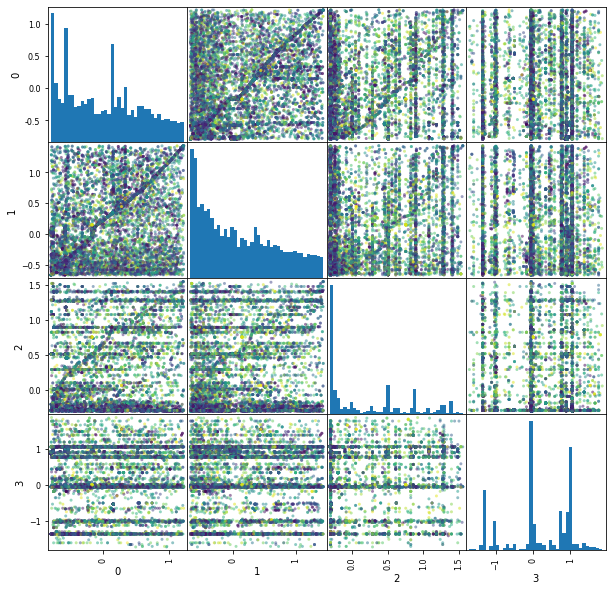

In [11]:
df = pd.DataFrame(X)
grr = pd.plotting.scatter_matrix(df,c = labels,hist_kwds={'bins':40}, figsize=[10,10])

In [12]:
# import pymysql
# conn = pymysql.Connect(  # 配置数据库
#     host='1.15.220.155',
#     port=3306,
#     user='test',
#     password='991125',
#     db='spider',
#     charset='UTF8'
# )
# cursor = conn.cursor()

# sql = 'select ipc from cluster'
# cursor.execute(sql)
# res = cursor.fetchall()
# count = 1
# for ip in res:
#     m = 0
#     sum = 0
#     ip = ip[0]
#     numbers = ip.split('.')
#     for n in numbers:
#         sum += int(n) * (count + m)
#         m += 1
#     sql = 'update cluster set ipc_sum = %s where ipc = %s'
#     cursor.execute(sql,[sum, ip])
#     conn.commit()

In [13]:
from sklearn.neighbors import NearestNeighbors
from random import sample
import numpy as np
import pandas as pd
from numpy.random import uniform

def hopkins_statistic(x):
	d = x.shape[1]
	n = len(x)
	m = int(0.1*n)
	nbrs = NearestNeighbors(n_neighbors=1).fit(x.values)
	rand_x = sample(range(0,n),m)
	ujd = []
	wjd = []
	for j in range(0,m):
		u_dist, _ = nbrs.kneighbors(uniform(np.min(x,axis=0), np.max(x, axis=0), d).reshape(1,-1), 2)
		ujd.append(u_dist[0][1])
		w_dist, _ = nbrs.kneighbors(x.iloc[rand_x[j]].values.reshape(1, -1), 2)
		wjd.append(w_dist[0][1])
	h = sum(ujd)/(sum(ujd)+sum(wjd))
	if np.isnan(h):
		print(ujd, wjd)
		h = 0
	return h
print(hopkins_statistic(pd.DataFrame(X)))

0.8165641779531827


In [14]:
# import pymysql
# conn = pymysql.Connect(  # 配置数据库
#     host='1.15.220.155',
#     port=3306,
#     user='test',
#     password='991125',
#     db='spider',
#     charset='UTF8'
# )
# cursor = conn.cursor()

# sql = 'update cluster set label = %s where domain = %s'
# for i in range(len(labels)):
#     cursor.execute(sql, [labels[i], domains.iloc[i][0]])
#     print(sql%(labels[i], domains.iloc[i][0]))
#     conn.commit()

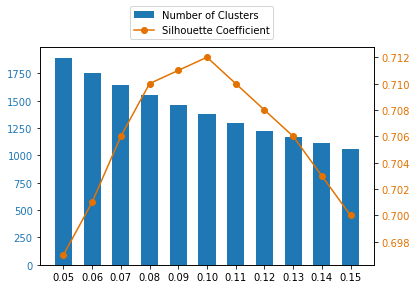

In [17]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.tick_params(axis = 'y', labelcolor = 'C0')
data = [0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15]
data = [0,1,2,3,4,5,6,7,8,9,10]
value = [0.697,0.701,0.706,0.710,0.711,0.712,0.710,0.708,0.706,0.703,0.700]
height = [1893,1750,1640,1549,1459,1379,1300,1222,1164,1111,1063]
l1 = ax1.bar(data, height, label='Number of Clusters', width=0.6)
ax2 = ax1.twinx()
plt.tick_params(axis = 'y', labelcolor = '#E37200')
# 折线图
l2 = ax2.plot(data, value, 'o-', color='#E37200', label='Silhouette Coefficient')
plt.xticks(data,[0.05,0.06,0.07,0.08,0.09,'0.10',0.11,0.12,0.13,0.14,0.15])
fig.legend(loc='upper center',bbox_to_anchor=(0.5, 1.04))
plt.show()
fig.savefig('silhouette2.pdf',dpi=600,bbox_inches = 'tight')

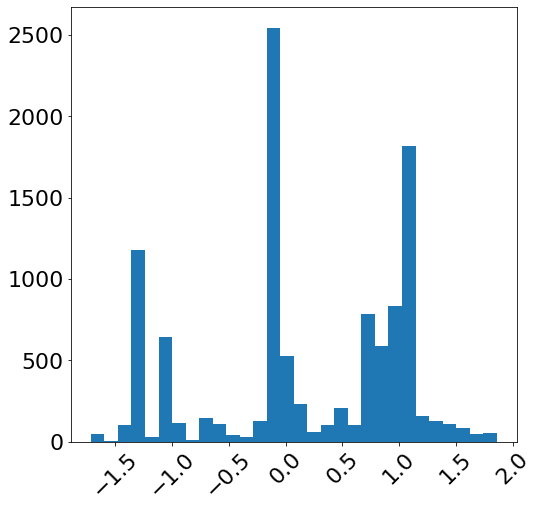

In [27]:
import matplotlib.pyplot as plt
data = df[[3]]
plt.figure(figsize=[8,8])
plt.hist(data, bins=30)
# plt.xlabel('value', fontsize=23)
# plt.ylabel('count', fontsize=23)
# plt.xticks([-0.50,-0.25,0.00,0.25,0.5,0.75,1.00,1.25,1.50])
plt.xticks(fontsize=22, rotation=45)
plt.yticks(fontsize=22)
plt.savefig('ipc.pdf') #指定分辨率保存
